In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
import s3fs

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
#import seaborn as sns    NOTE: Will have to install seaborn later
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
fs = s3fs.S3FileSystem(anon=False)

# CSV
with fs.open('ds-2019-test-buck/application_train.csv') as f:
    train_df = pd.read_csv(f)

    #df = pd.read_csv('s3a://group12credits/application_train.csv')

In [4]:
from sklearn import preprocessing
categorical_feats = [
    f for f in train_df.columns if train_df[f].dtype == 'object'
]
for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(train_df[col].values.astype('str')))
    train_df[col] = lb.transform(list(train_df[col].values.astype('str')))


In [5]:
# one-hot encoding of categorical variables
train_df = pd.get_dummies(train_df)

print('Training Features shape: ', train_df.shape)

Training Features shape:  (307511, 122)


In [6]:

train_df['DAYS_BIRTH'] = train_df['DAYS_BIRTH'].abs()/365
train_df.rename(columns = {'DAYS_BIRTH':'YEAR_BIRTH'},inplace = True)
train_df['DAYS_EMPLOYED'] = train_df['DAYS_EMPLOYED'].abs()/365
train_df.rename(columns = {'DAYS_EMPLOYED':'YEAR_EMPLOYED'},inplace = True)
train_df['DAYS_REGISTRATION'] = train_df['DAYS_REGISTRATION'].abs()/365
train_df.rename(columns = {'DAYS_REGISTRATION':'YEAR_REGISTRATION'},inplace = True)
train_df['DAYS_ID_PUBLISH'] = train_df['DAYS_ID_PUBLISH'].abs()/365
train_df.rename(columns = {'DAYS_ID_PUBLISH':'YEAR_ID_PUBLISH'},inplace = True)
train_df['OWN_CAR_AGE'].fillna('0')

0          0
1          0
2         26
3          0
4          0
5          0
6         17
7          8
8          0
9          0
10         0
11         0
12         0
13        23
14         0
15        17
16         0
17         0
18         0
19         0
20         7
21        14
22         0
23         0
24         7
25         0
26         0
27         0
28         1
29         0
          ..
307481     0
307482    11
307483     0
307484     1
307485     0
307486     9
307487     0
307488     0
307489     0
307490     0
307491    15
307492     2
307493     0
307494    15
307495     2
307496     0
307497     0
307498    10
307499     0
307500     0
307501     0
307502     0
307503     0
307504     0
307505     0
307506     0
307507     0
307508     0
307509     0
307510     0
Name: OWN_CAR_AGE, dtype: object

In [7]:
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

TypeError: slice indices must be integers or None or have an __index__ method

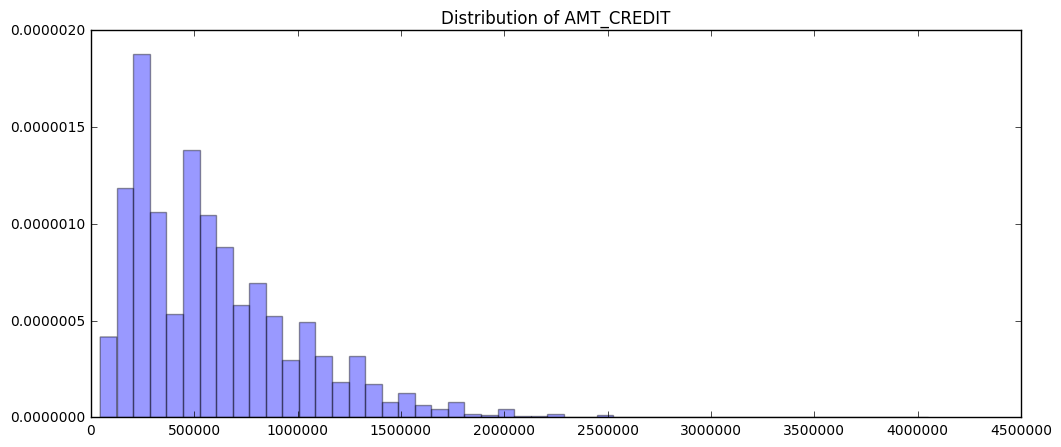

In [8]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train_df["AMT_CREDIT"])

TypeError: slice indices must be integers or None or have an __index__ method

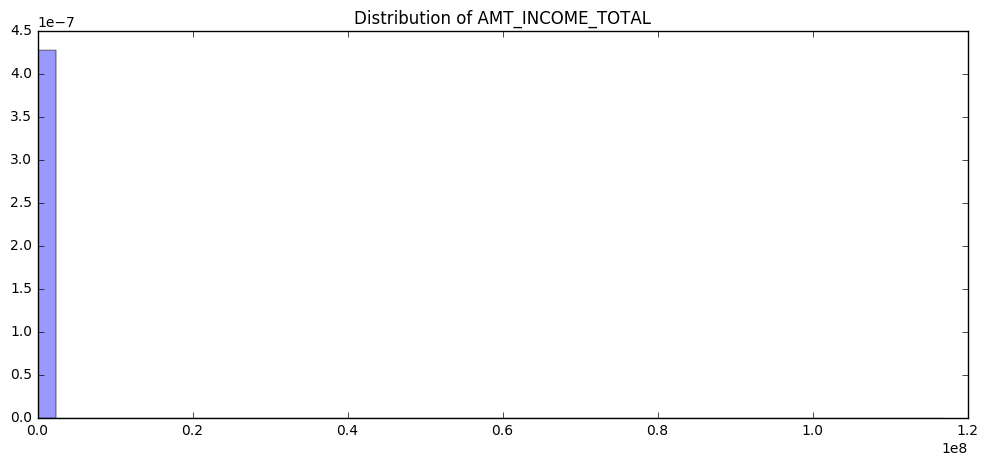

In [9]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(train_df["AMT_INCOME_TOTAL"].dropna())

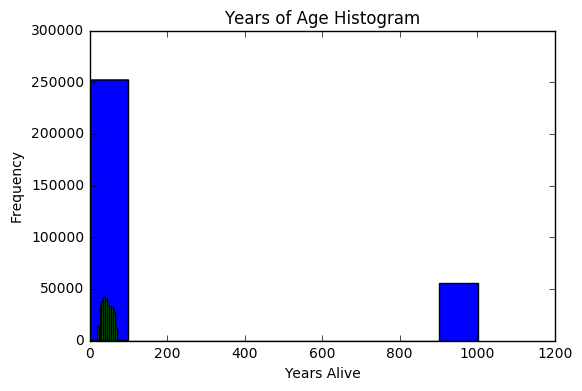

In [11]:
train_df['YEAR_EMPLOYED'].plot.hist(title = 'Years Employment Histogram');
plt.xlabel('Years Employed');
train_df['YEAR_BIRTH'].plot.hist(title = 'Years of Age Histogram');
plt.xlabel('Years Alive');

TypeError: slice indices must be integers or None or have an __index__ method

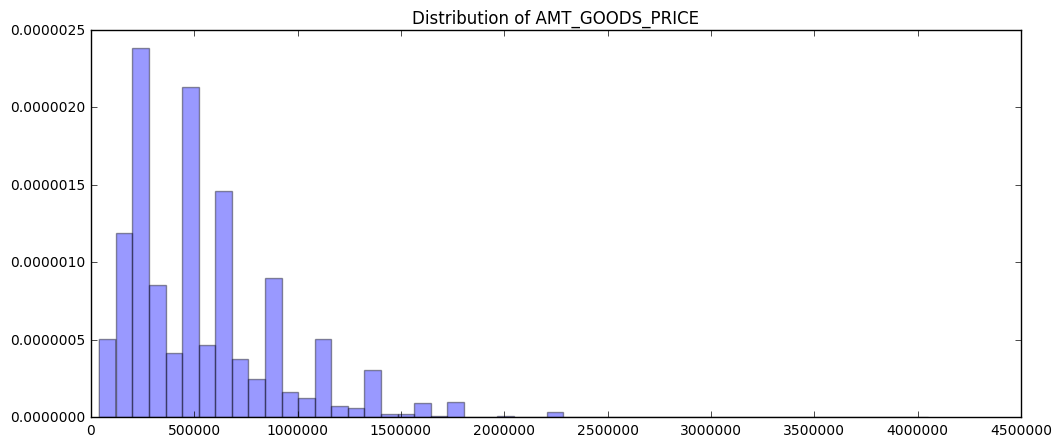

In [12]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(train_df["AMT_GOODS_PRICE"].dropna())